In [4]:
from scipy import io
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
stat_it = pd.read_hdf('stat_it.hdf')
krylov = pd.read_hdf('krylov.hdf')
direct = pd.read_hdf('direct.hdf')

In [6]:
# Remove failed methods
stat_it = stat_it[stat_it['info']==0]
krylov = krylov[krylov['info']==0]
direct = direct[direct['info']==0]

In [7]:
stat_it

,method,mat_name,mat_size,info,start_time,end_time,dt
0,jac,20x20x24,9600.0,0.0,1.493909e+09,1.493909e+09,0.107067
1,gs,20x20x24,9600.0,0.0,1.493909e+09,1.493909e+09,0.583946
2,sor,20x20x24,9600.0,0.0,1.493909e+09,1.493909e+09,0.963248
3,jor,20x20x24,9600.0,0.0,1.493909e+09,1.493909e+09,0.101481
5,jac,10x10x12,1200.0,0.0,1.493909e+09,1.493909e+09,0.010358
6,gs,10x10x12,1200.0,0.0,1.493909e+09,1.493909e+09,0.031962
7,sor,10x10x12,1200.0,0.0,1.493909e+09,1.493909e+09,0.041262
8,jor,10x10x12,1200.0,0.0,1.493909e+09,1.493909e+09,0.009823
10,jac,10x10x24,2400.0,0.0,1.493909e+09,1.493909e+09,0.023828
11,gs,10x10x24,2400.0,0.0,1.493909e+09,1.493909e+09,0.082086


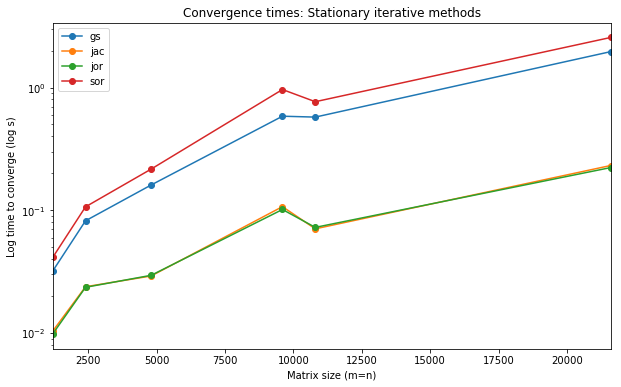

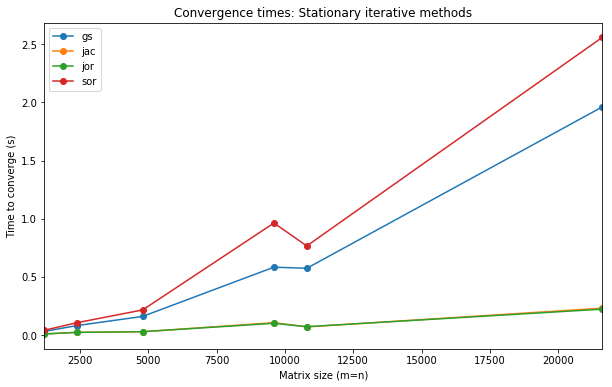

In [8]:
fig = plt.figure(figsize=[10,6])
ax = plt.gca()
srtd = stat_it.sort_values('mat_size')
srtd.groupby('method').plot(x='mat_size',y='dt',ax=ax,marker='o')
ax.set_yscale('log')
plt.xlabel('Matrix size (m=n)')
plt.ylabel('Log time to converge (log s)')
plt.title('Convergence times: Stationary iterative methods')
plt.legend([v[0] for v in srtd.groupby('method')['method']])
plt.savefig('plots/stat_it_dt_log.png')

fig = plt.figure(figsize=[10,6])
ax = plt.gca()
srtd.groupby('method').plot(x='mat_size',y='dt',ax=ax,marker='o')
plt.xlabel('Matrix size (m=n)')
plt.ylabel('Time to converge (s)')
plt.title('Convergence times: Stationary iterative methods')
plt.legend([v[0] for v in srtd.groupby('method')['method']])
plt.savefig('plots/stat_it_dt.png')

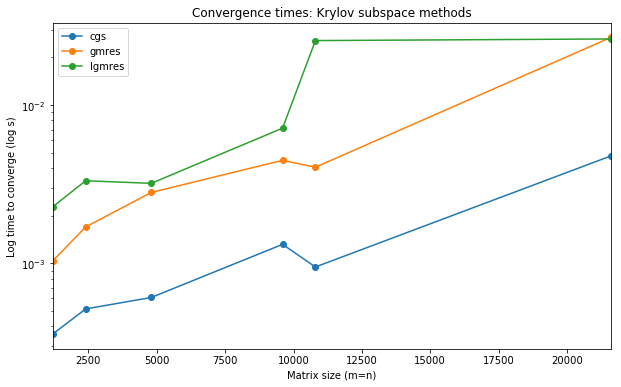

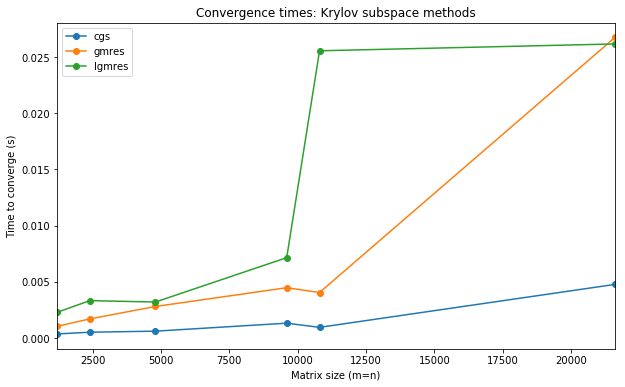

In [9]:
fig = plt.figure(figsize=[10,6])
ax = plt.gca()
srtd = krylov.sort_values('mat_size')
srtd.groupby('method').plot(x='mat_size',y='dt',ax=ax,marker='o')
ax.set_yscale('log')
plt.xlabel('Matrix size (m=n)')
plt.ylabel('Log time to converge (log s)')
plt.title('Convergence times: Krylov subspace methods')
plt.legend([v[0] for v in srtd.groupby('method')['method']])
plt.savefig('plots/krylov_dt_log.png')

fig = plt.figure(figsize=[10,6])
ax = plt.gca()
srtd.groupby('method').plot(x='mat_size',y='dt',ax=ax,marker='o')
plt.xlabel('Matrix size (m=n)')
plt.ylabel('Time to converge (s)')
plt.title('Convergence times: Krylov subspace methods')
plt.legend([v[0] for v in srtd.groupby('method')['method']])
plt.savefig('plots/krylov_dt.png')

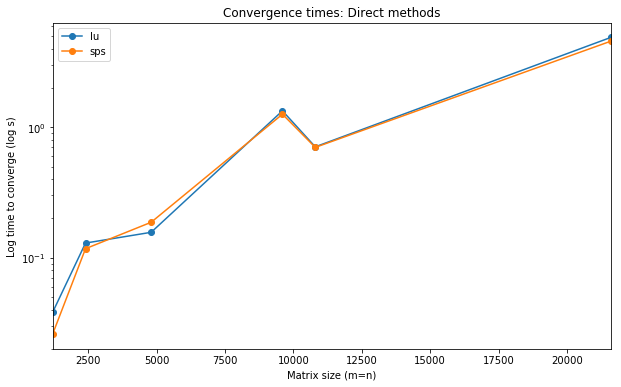

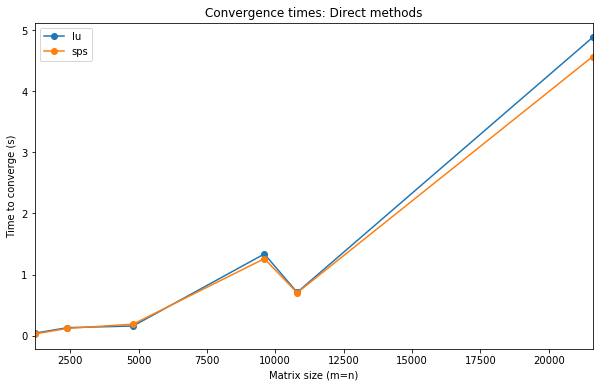

In [10]:
fig = plt.figure(figsize=[10,6])
ax = plt.gca()
srtd = direct.sort_values('mat_size')
srtd.groupby('method').plot(x='mat_size',y='dt',ax=ax,marker='o')
ax.set_yscale('log')
plt.xlabel('Matrix size (m=n)')
plt.ylabel('Log time to converge (log s)')
plt.title('Convergence times: Direct methods')
plt.legend([v[0] for v in srtd.groupby('method')['method']])
plt.savefig('plots/direct_dt_log.png')

fig = plt.figure(figsize=[10,6])
ax = plt.gca()
srtd.groupby('method').plot(x='mat_size',y='dt',ax=ax,marker='o')
plt.xlabel('Matrix size (m=n)')
plt.ylabel('Time to converge (s)')
plt.title('Convergence times: Direct methods')
plt.legend([v[0] for v in srtd.groupby('method')['method']])
plt.savefig('plots/direct_dt.png')